In [20]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

The image is  <class 'numpy.ndarray'>  with dimensions  (540, 960, 3)


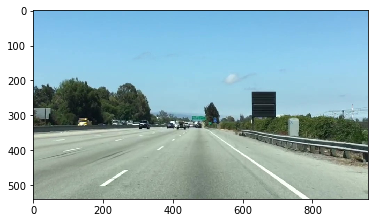

In [21]:
# Read in the image

img = mpimg.imread("img/test.jpg")
print("The image is ",type(img)," with dimensions ",img.shape)
plt.imshow(img)

In [22]:
# Define color thresholds

r_threshold = 200
g_threshold = 200
b_threshold = 200
rgb_threshold = [r_threshold,g_threshold,b_threshold]

color_thresholds = (img[:,:,0]<rgb_threshold[0]) | (img[:,:,1]<rgb_threshold[1]) | (img[:,:,2]<rgb_threshold[2])

In [23]:
# Define region threshold

left_bottom = (120,540)
right_bottom = (820,540)
apex = (500,300)

XX,YY = np.meshgrid(np.arange(img.shape[1]),np.arange(img.shape[0]))
fit_left = np.polyfit((left_bottom[0],apex[0]),(left_bottom[1],apex[1]),1)
fit_right = np.polyfit((right_bottom[0],apex[0]),(right_bottom[1],apex[1]),1)
fit_bottom = np.polyfit((left_bottom[0],right_bottom[0]),(left_bottom[1],right_bottom[1]),1)

region_thresholds = (YY>(fit_left[0]*XX + fit_left[1])) & (YY>(fit_right[0]*XX + fit_right[1])) & (YY<(fit_bottom[0]*XX + fit_bottom[1]))

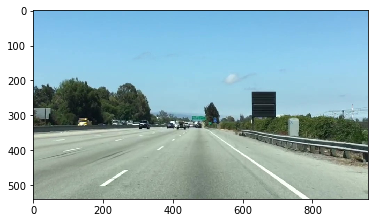

In [24]:
# Make a copy of the original image on which to apply the thresholds

img_copy = np.copy(img)
plt.imshow(img_copy)

In [25]:
#img_copy[~region_thresholds | color_thresholds] = [0,0,0]

In [26]:
img_copy[~color_thresholds & region_thresholds] = [255,0,0]

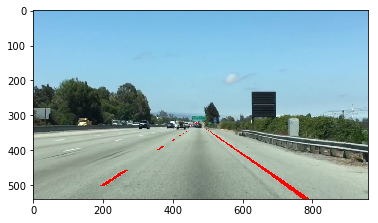

In [27]:
plt.imshow(img_copy)